## Cleaning and exploration of medical insurance data

#### Importing required modules

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

#### Reading and describing the data

In [291]:
df = pd.read_csv("medical_insurance.csv")

In [292]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Checking for null values

In [293]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [294]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [296]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of", feature)
    print(df[feature].value_counts())
    print("\n")

Distribution of sex
male      1406
female    1366
Name: sex, dtype: int64


Distribution of smoker
no     2208
yes     564
Name: smoker, dtype: int64


Distribution of region
southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64




In [297]:
df.groupby(['sex']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})


charges                      bmi        age
         count          mean       mean       mean
sex                                               
female    1366  12486.831977  30.434473  39.481698
male      1406  14013.872721  30.960633  38.748222

In [298]:
df.groupby(['children']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
           count          mean       mean       mean
children                                            
0           1186  12317.920881  30.628508  38.431703
1            672  12722.650521  30.705744  39.300595
2            496  15268.182723  31.035806  39.286290
3            324  15304.070620  30.580000  41.395062
4             52  13550.983876  31.314615  38.769231
5             42   8706.036629  28.915000  35.904762

In [299]:
df.groupby(['region']).agg({'charges': ['count', 'mean'], 'bmi': 'mean', 'age': 'mean'})

charges                      bmi        age
            count          mean       mean       mean
region                                               
northeast     658  13475.874737  29.157781  39.243161
northwest     664  12463.129315  29.147259  39.081325
southeast     766  14748.777706  33.478773  38.762402
southwest     684  12164.196435  30.584503  39.397661

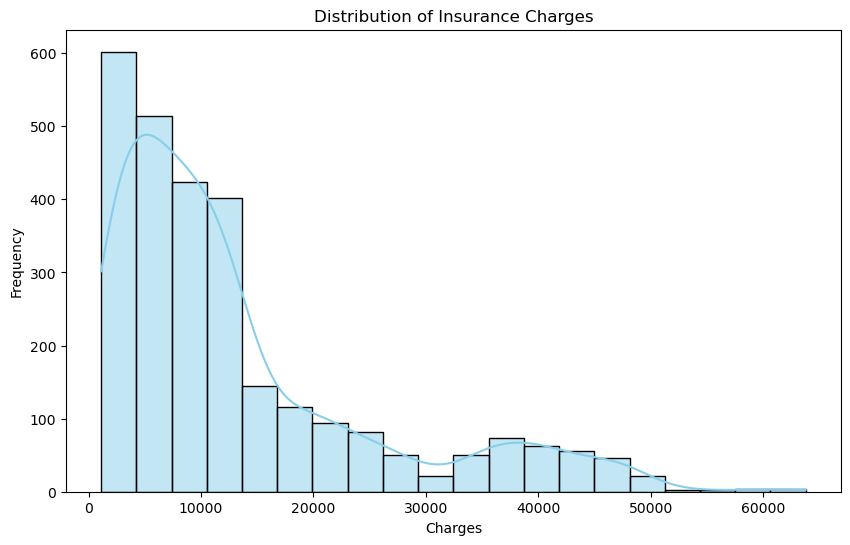

In [300]:
sns.histplot(df['charges'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

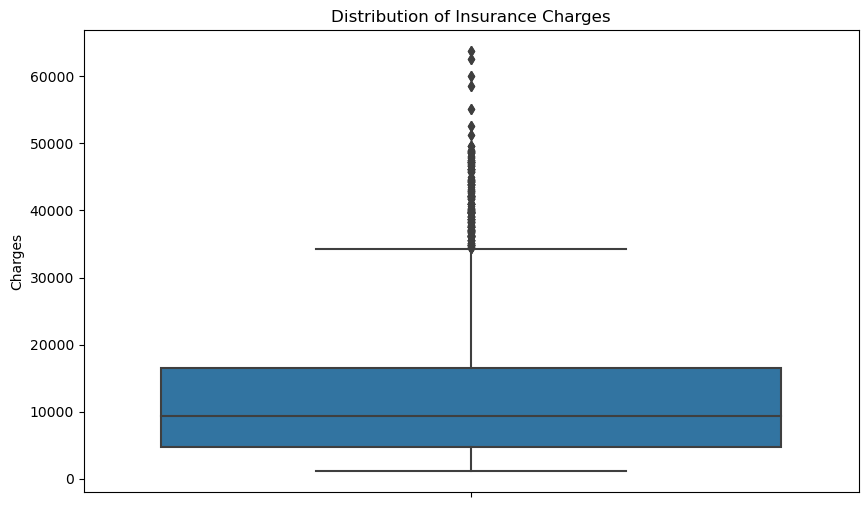

In [301]:
sns.boxplot(y='charges', data=df)
plt.title('Distribution of Insurance Charges')
plt.ylabel('Charges')
# plt.ylabel('Frequency')
plt.show()

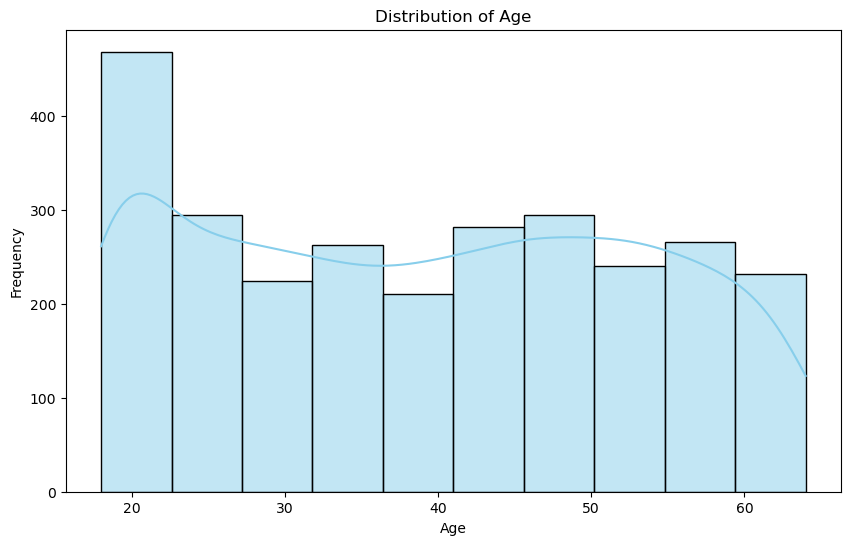

In [302]:
sns.histplot(df['age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

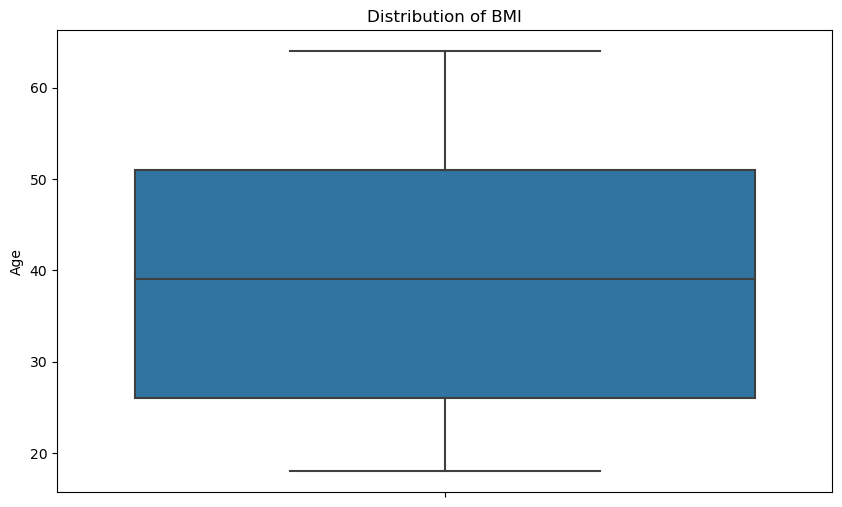

In [303]:
sns.boxplot(y='age', data=df)
plt.title('Distribution of BMI')
plt.ylabel('Age')
# plt.ylabel('Frequency')
plt.show()

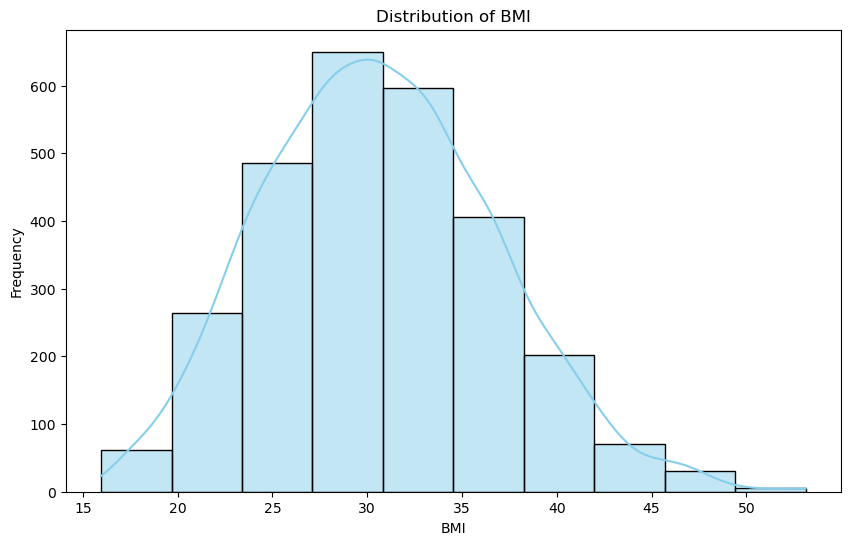

In [304]:
sns.histplot(df['bmi'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

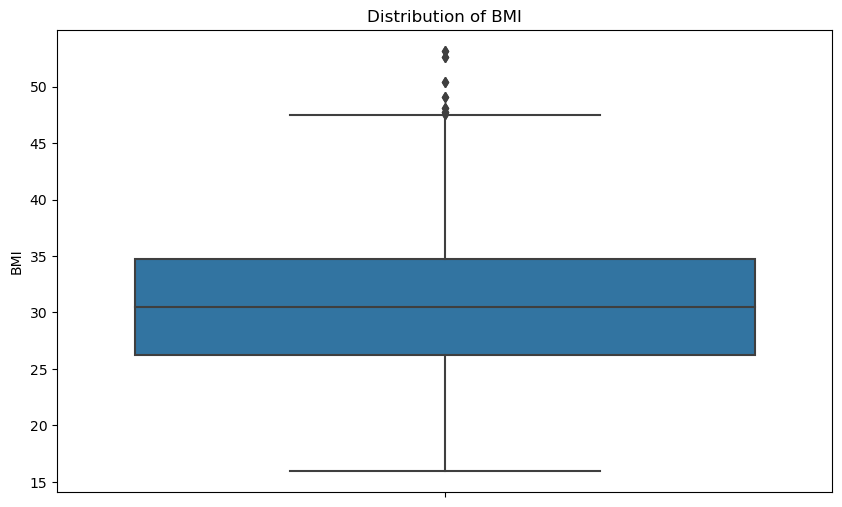

In [305]:
sns.boxplot(y='bmi', data=df)
plt.title('Distribution of BMI')
plt.ylabel('BMI')
# plt.ylabel('Frequency')
plt.show()

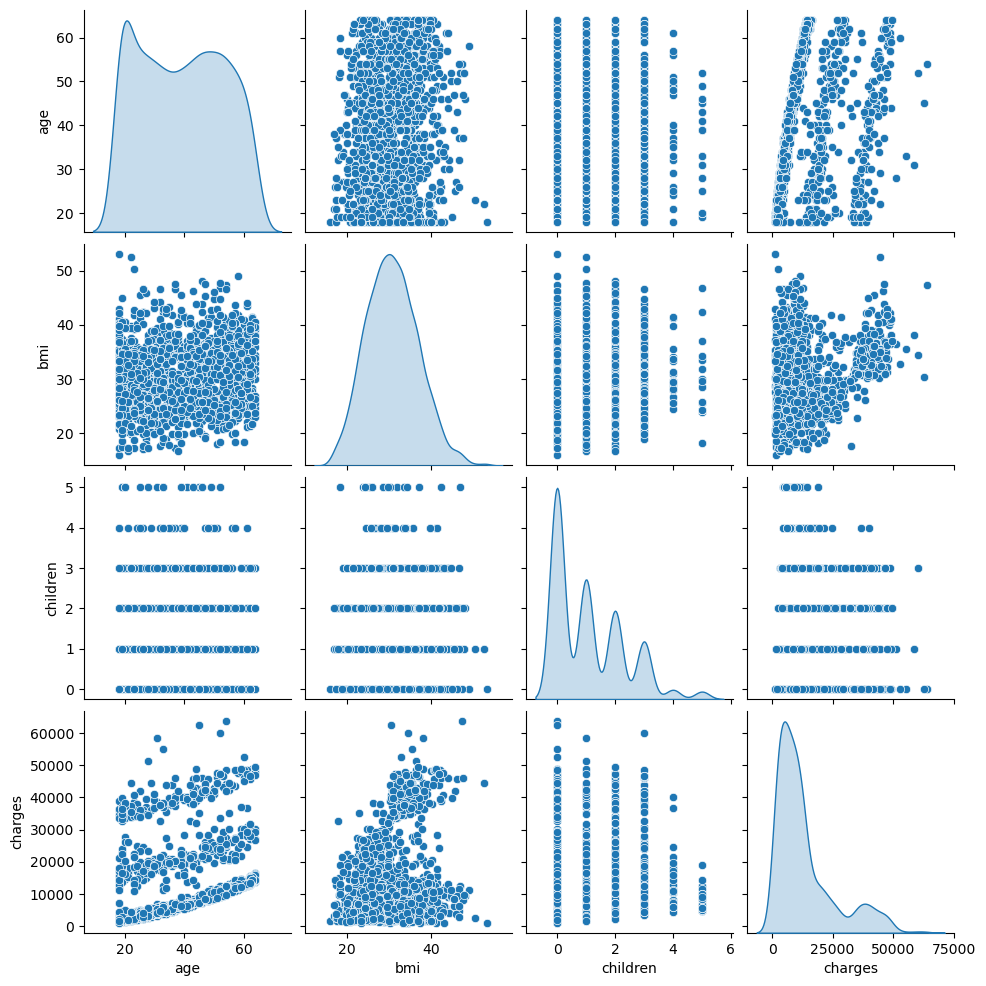

In [306]:
sns.pairplot(df, diag_kind='kde')
plt.show()

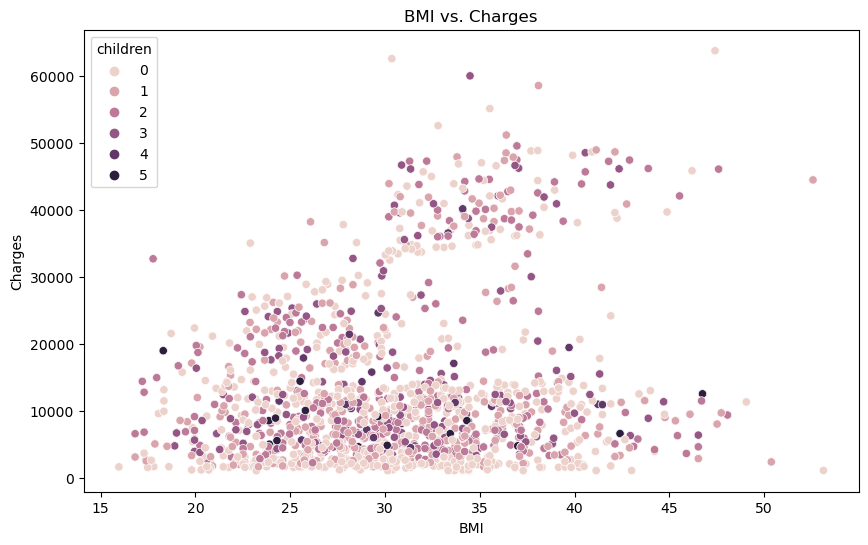

In [315]:
sns.scatterplot(data=df, x="bmi", y="charges", hue="children")    
#plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

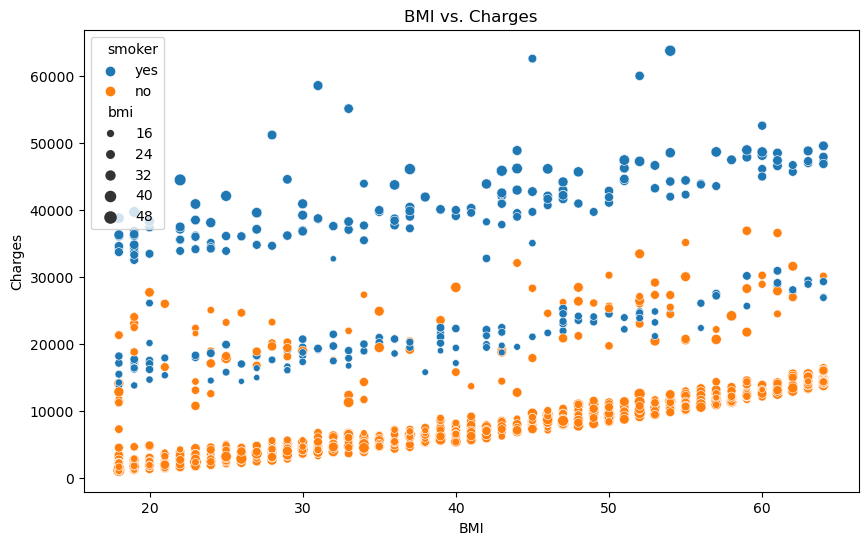

In [321]:
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", size="bmi")    
#plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

categorical_features = ['sex', 'smoker', 'region']

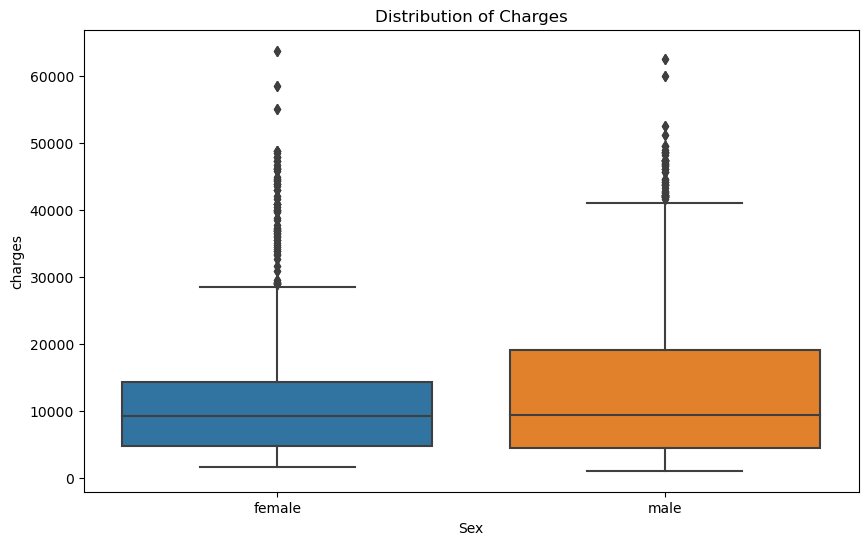

In [310]:
sns.boxplot(y='charges', x= "sex", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

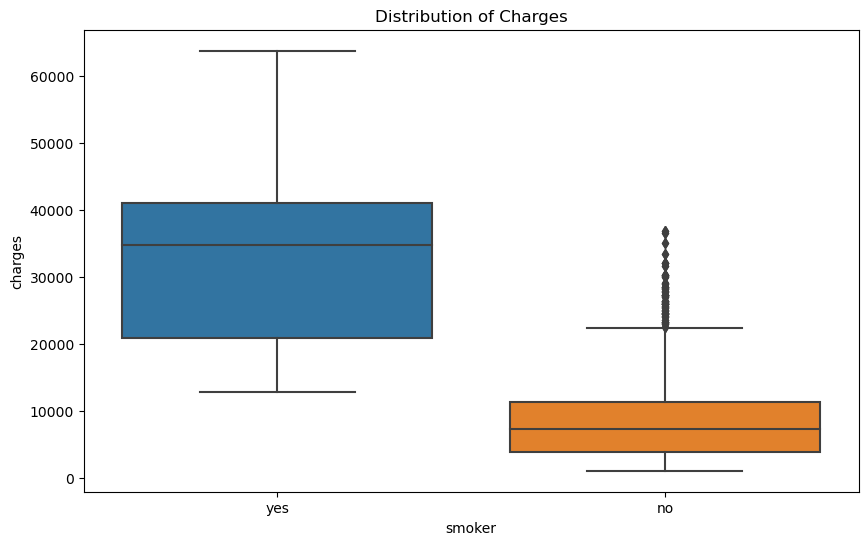

In [314]:
sns.boxplot(y='charges', x= "smoker", data=df)
plt.title('Distribution of Charges')
plt.xlabel('smoker')
# plt.ylabel('Frequency')
plt.show()

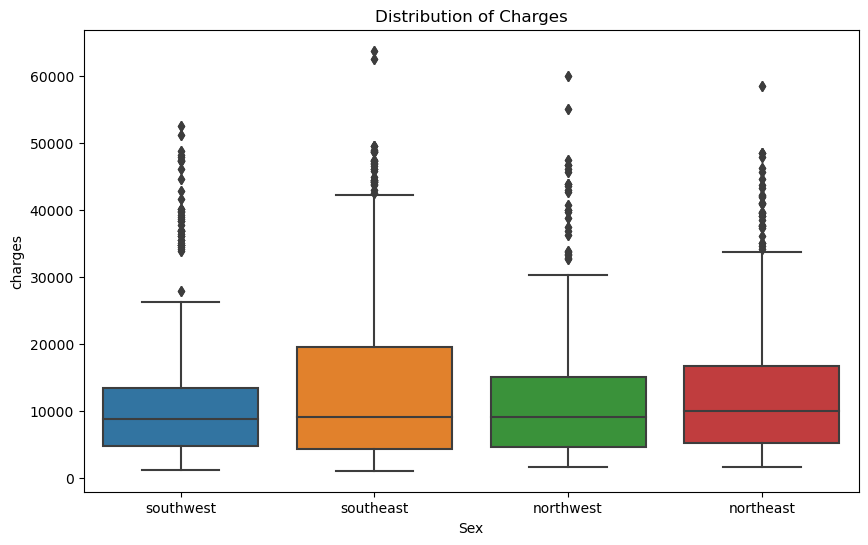

In [312]:
sns.boxplot(y='charges', x= "region", data=df)
plt.title('Distribution of Charges')
plt.xlabel('Sex')
# plt.ylabel('Frequency')
plt.show()

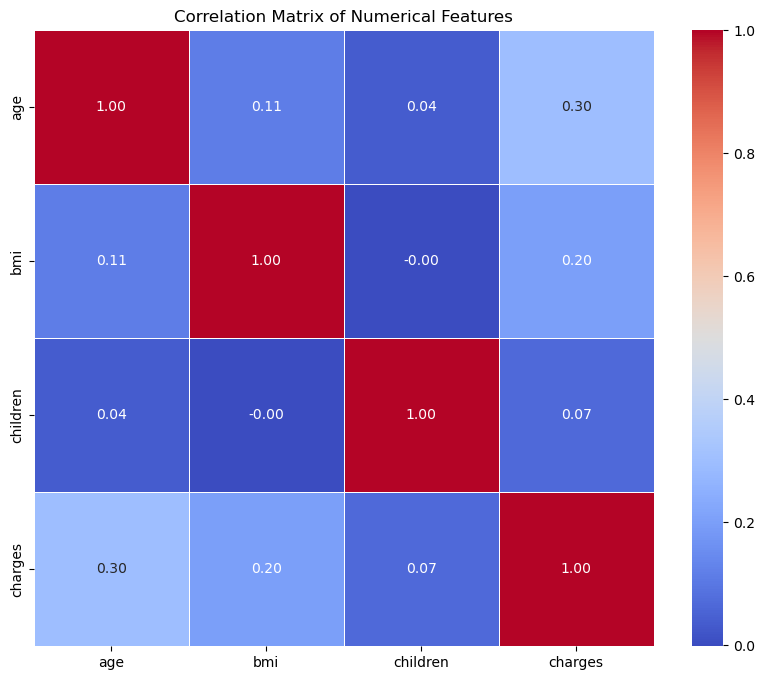

In [313]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Scaling Y and see if it becomes normal

In [323]:
scaler = StandardScaler()
print(scaler.fit(df[['age','bmi','children','charges']]))

StandardScaler()


In [324]:
print(scaler.mean_)

[3.91096681e+01 3.07013492e+01 1.10173160e+00 1.32613700e+04]


In [325]:
scaled_df = scaler.transform(df[['age','bmi','children','charges']])

In [326]:
scaled_df = pd.DataFrame(scaled_df, columns=('sc_age','sc_bmi','sc_children','sc_charges'))

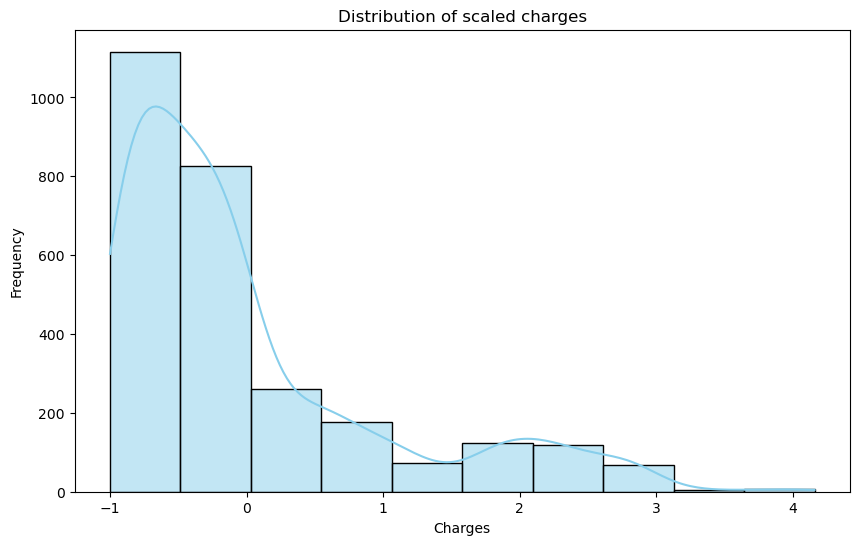

In [327]:
sns.histplot(scaled_df['sc_charges'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of scaled charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [328]:
scaled_df

,sc_age,sc_bmi,sc_children,sc_charges
0,-1.428353,-0.457114,-0.907084,0.298245
1,-1.499381,0.500731,-0.083758,-0.949483
2,-0.789099,0.375085,1.562893,-0.725285
3,-0.433959,-1.304814,-0.907084,0.717976
4,-0.504987,-0.297201,-0.907084,-0.773238
...,...,...,...,...
2767,0.560436,2.385417,-0.083758,-0.386146
2768,-1.286297,0.636167,-0.907084,-0.925233
2769,-1.428353,-0.762253,-0.083758,0.262521
2770,-1.144240,-1.955887,-0.907084,0.685951


In [329]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [330]:
data_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,southeast,8569.86180
2768,21,0,34.600,0,0,southwest,2020.17700
2769,19,1,26.030,1,1,northwest,16450.89470
2770,23,1,18.715,0,0,northwest,21595.38229


In [331]:
data_encoded = df.copy()
OHencoder = OneHotEncoder(sparse=False)
new_df = OHencoder.fit_transform(data_encoded[['region']])
en_df = pd.DataFrame(new_df, columns=("northeast","northwest","southeast","southwest"))

In [332]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Sex', 'Smoker', and 'Region' columns
data_encoded['sex'] = label_encoder.fit_transform(df['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(df['smoker'])

In [333]:
cat_encoded = data_encoded.join(en_df)

In [334]:
cat_encoded.drop(columns=["age", "bmi", "region", "charges", "northeast", "children"], inplace=True)

In [335]:
final_scaled_data = cat_encoded.join(scaled_df)

In [336]:
cols_float = ["northwest","southeast","southwest"]
final_scaled_data[cols_float] = final_scaled_data[cols_float].applymap(np.int64)

In [337]:
final_scaled_data.head()

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges
0,0,1,0,0,1,-1.428353,-0.457114,-0.907084,0.298245
1,1,0,0,1,0,-1.499381,0.500731,-0.083758,-0.949483
2,1,0,0,1,0,-0.789099,0.375085,1.562893,-0.725285
3,1,0,1,0,0,-0.433959,-1.304814,-0.907084,0.717976
4,1,0,1,0,0,-0.504987,-0.297201,-0.907084,-0.773238


In [338]:
# Separate features (X) and target variable (y)
X = final_scaled_data.drop('sc_charges', axis=1)
y = final_scaled_data['sc_charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Compute the Mean Squared Error (MSE) of the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Mean Squared Error (Linear Regression):", lr_mse)

Mean Squared Error (Linear Regression): 0.2781522113604448


In [339]:
lr_model.coef_

array([-0.00489286,  1.97721337, -0.03218387, -0.07887748, -0.08817923,
        0.29632278,  0.16496008,  0.05284427])

In [340]:
lr_model.feature_names_in_

array(['sex', 'smoker', 'northwest', 'southeast', 'southwest', 'sc_age',
       'sc_bmi', 'sc_children'], dtype=object)

In [341]:
lr_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [342]:
r_sqr = lr_model.score(X_test, y_test)

In [343]:
r_sqr

0.726136709346683

In [344]:
print(f"intercept: {lr_model.intercept_}")

print(f"slope: {lr_model.coef_}")

intercept: -0.34815498133146655
slope: [-0.00489286  1.97721337 -0.03218387 -0.07887748 -0.08817923  0.29632278
  0.16496008  0.05284427]


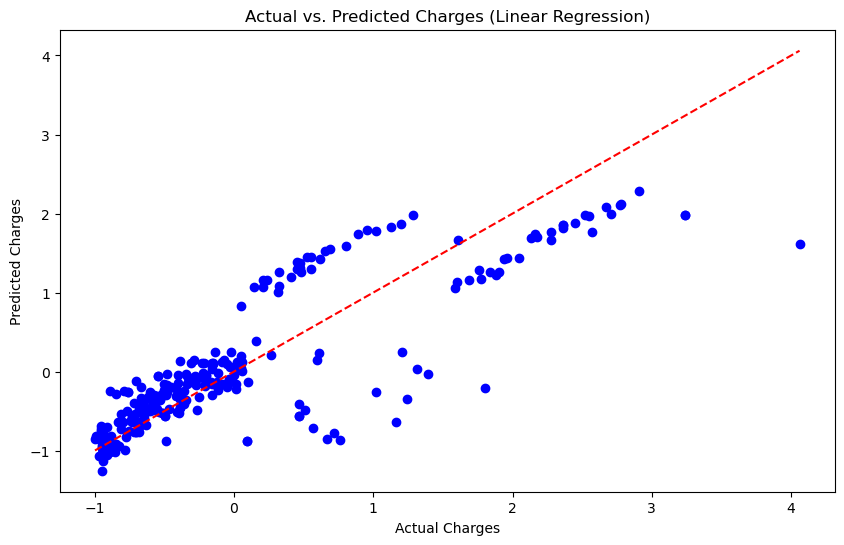

In [345]:
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Linear Regression)')
plt.show()


In [346]:
lr_predictions

array([-0.37116139, -0.38160166, -0.81130891,  1.69429607, -0.85958957,
       -0.75956919, -0.95143862, -0.99091819, -0.2862054 ,  1.07016415,
        1.26616316, -0.1371251 , -1.03239625, -0.0563859 , -0.62909006,
       -1.01704044, -0.56186759,  1.42869732,  0.25129474, -0.2365085 ,
       -0.3102821 , -0.93178407, -0.12174384, -0.28437899,  0.03243754,
        1.9842271 , -0.24790992,  1.26434143,  0.25033226, -0.12101865,
       -0.51921868, -0.56186759, -0.53090855,  0.04813083, -0.3090154 ,
        1.15780007, -0.34126492, -0.8149625 , -0.14495542, -0.59110464,
        0.12486406,  1.13810228,  1.76967017, -0.52321676, -0.93770124,
       -0.52531794,  1.81148224,  1.97837497, -0.46758852, -0.32312894,
       -0.34305909, -0.75964136, -0.15595588,  2.28566172, -0.18363775,
       -0.81130891,  1.25864507, -0.13141275,  0.10586412, -0.04678288,
       -0.75908972,  1.07019279, -0.64395978,  1.37436278, -0.76889364,
       -0.15180377, -0.93713485,  1.66576256,  0.14217672, -0.05

In [347]:
train_pred_df = X_train.copy()

In [348]:
train_pred_df['sc_charges'] = y_train.to_list()

In [349]:
train_pred_df['sc_charges_pred'] = lr_model.predict(X_train)

In [350]:

train_origin = scaler.inverse_transform(train_pred_df[['sc_age','sc_bmi','sc_children','sc_charges']])

In [351]:
train_origin = pd.DataFrame(train_origin, columns=['age','bmi','children','charges'], index=train_pred_df.index)

In [352]:
train_pred_df = train_pred_df.join(train_origin, rsuffix='_origin')

In [353]:
train_pred_df

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges,sc_charges_pred,age,bmi,children,charges
738,1,1,0,0,0,-1.144240,0.167851,1.562893,1.887122,1.395380,23.0,31.730,3.0,36189.10170
116,1,0,0,1,0,1.341746,2.995696,-0.907084,-0.154742,0.411901,58.0,49.060,0.0,11381.32540
1800,0,0,1,0,0,-1.428353,0.725914,-0.907084,-0.915791,-0.731780,19.0,35.150,0.0,2134.90150
1746,0,0,0,0,0,0.631464,0.260862,0.739567,-0.264875,-0.078924,48.0,32.300,2.0,10043.24900
1225,0,0,0,1,0,-0.433959,1.487947,-0.083758,-0.696791,-0.314599,33.0,39.820,1.0,4795.65680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,1,0,0,0,1,-1.286297,-1.370901,-0.083758,-0.918410,-1.052956,21.0,22.300,1.0,2103.08000
269,1,0,0,0,0,0.702492,-0.793257,-0.083758,-0.327492,-0.280165,49.0,25.840,1.0,9282.48060
530,1,1,0,1,0,1.270718,1.864884,-0.083758,2.914846,2.225036,57.0,42.130,1.0,48675.51770
1150,0,0,0,0,0,-1.499381,-0.064675,-0.907084,-0.910125,-0.851059,18.0,30.305,0.0,2203.73595


In [354]:
train_pred = scaler.inverse_transform(train_pred_df[['sc_age','sc_bmi','sc_children','sc_charges_pred']])
train_pred = pd.DataFrame(train_pred, columns=['age','bmi','children','charges'], index=train_pred_df.index)

In [355]:
train_pred_df = train_pred_df.join(train_pred, rsuffix='_pred')

In [356]:
train_pred_df.drop(columns=['age_pred','bmi_pred','children_pred'], inplace=True)

In [357]:
train_pred_df

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges,sc_charges_pred,age,bmi,children,charges,charges_pred
738,1,1,0,0,0,-1.144240,0.167851,1.562893,1.887122,1.395380,23.0,31.730,3.0,36189.10170,30214.643131
116,1,0,0,1,0,1.341746,2.995696,-0.907084,-0.154742,0.411901,58.0,49.060,0.0,11381.32540,18265.787666
1800,0,0,1,0,0,-1.428353,0.725914,-0.907084,-0.915791,-0.731780,19.0,35.150,0.0,2134.90150,4370.555783
1746,0,0,0,0,0,0.631464,0.260862,0.739567,-0.264875,-0.078924,48.0,32.300,2.0,10043.24900,12302.475414
1225,0,0,0,1,0,-0.433959,1.487947,-0.083758,-0.696791,-0.314599,33.0,39.820,1.0,4795.65680,9439.130845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,1,0,0,0,1,-1.286297,-1.370901,-0.083758,-0.918410,-1.052956,21.0,22.300,1.0,2103.08000,468.398625
269,1,0,0,0,0,0.702492,-0.793257,-0.083758,-0.327492,-0.280165,49.0,25.840,1.0,9282.48060,9857.481165
530,1,1,0,1,0,1.270718,1.864884,-0.083758,2.914846,2.225036,57.0,42.130,1.0,48675.51770,40294.615514
1150,0,0,0,0,0,-1.499381,-0.064675,-0.907084,-0.910125,-0.851059,18.0,30.305,0.0,2203.73595,2921.366348


In [358]:
train_lr_mse = mean_squared_error(train_pred_df['charges'], train_pred_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", train_lr_mse)

Mean Squared Error (Linear Regression): 36292794.5798197


In [359]:
train_lr_mse = mean_squared_error(train_pred_df['sc_charges'], train_pred_df['sc_charges_pred'])
print("Mean Squared Error (Linear Regression):", train_lr_mse)

Mean Squared Error (Linear Regression): 0.2458657897185949


In [360]:
test_df = X_test.copy()
test_df['sc_charges'] = y_test.to_list()
test_df['sc_charges_pred'] = lr_model.predict(X_test)

In [361]:
test_origin = scaler.inverse_transform(test_df[['sc_age','sc_bmi','sc_children','sc_charges']])
test_origin = pd.DataFrame(test_origin, columns=['age','bmi','children','charges'], index=test_df.index)
test_df = test_df.join(test_origin)

In [362]:
test_pred = scaler.inverse_transform(test_df[['sc_age','sc_bmi','sc_children','sc_charges_pred']])
test_pred = pd.DataFrame(test_pred, columns=['age','bmi','children','charges'], index=test_df.index)
test_df = test_df.join(test_pred, rsuffix='_pred')
#train_pred_df = train_pred_df.join(train_pred, rsuffix='_pred')

In [363]:
test_df.drop(columns=['age_pred','bmi_pred','children_pred'], inplace=True)

In [364]:
test_lr_mse = mean_squared_error(test_df['charges'], test_df['charges_pred'])
print("Mean Squared Error (Linear Regression):", test_lr_mse)

Mean Squared Error (Linear Regression): 41058664.89348247


In [365]:
test_lr_mse = mean_squared_error(test_df['sc_charges'], test_df['sc_charges_pred'])
print("Mean Squared Error (Linear Regression):", test_lr_mse)

Mean Squared Error (Linear Regression): 0.2781522113604448


In [366]:
test_df['residual'] = test_df['charges'] - test_df['charges_pred']

In [367]:
test_df['residual']

2220    -3374.458381
864       157.397801
374     -2012.781238
422      5278.981957
840     -1291.408455
            ...     
341      -277.071779
2156    11673.953644
1011   -11280.651480
696     15605.429965
434     -1520.980604
Name: residual, Length: 278, dtype: float64

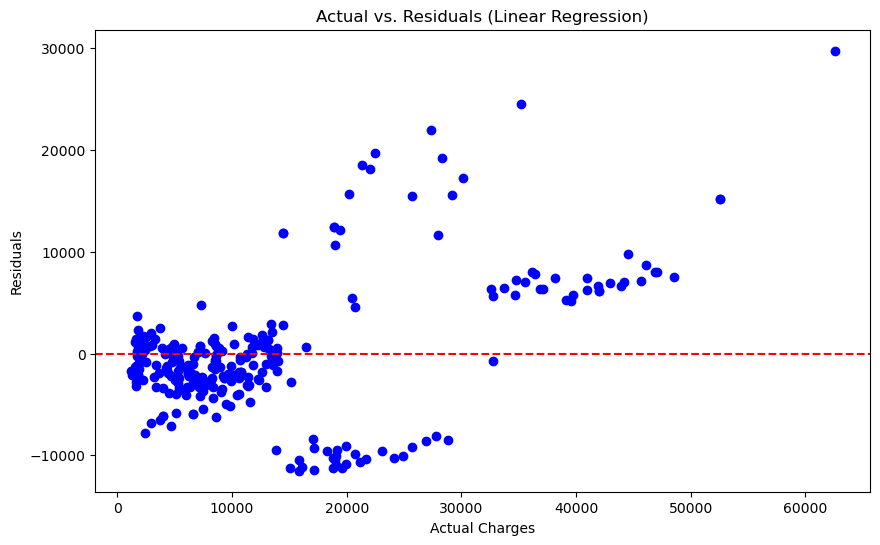

In [368]:
plt.scatter(y=test_df['residual'], x=test_df['charges'], color='blue')
plt.plot(color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Actual vs. Residuals (Linear Regression)')
plt.show()


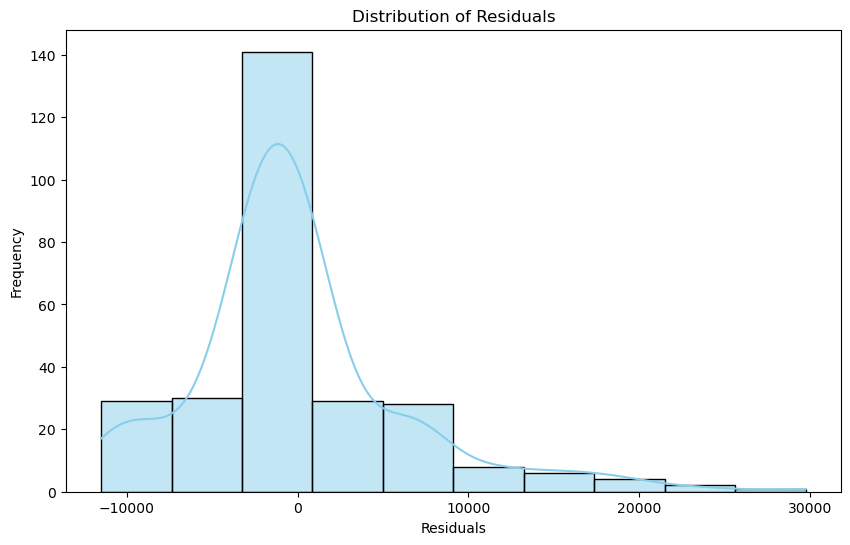

In [369]:
sns.histplot(test_df['residual'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [370]:
def act_vs_pred_plot(actual, predicted):
    plt.scatter(actual, predicted, color='blue')
    plt.plot(actual, actual, color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()
    return None

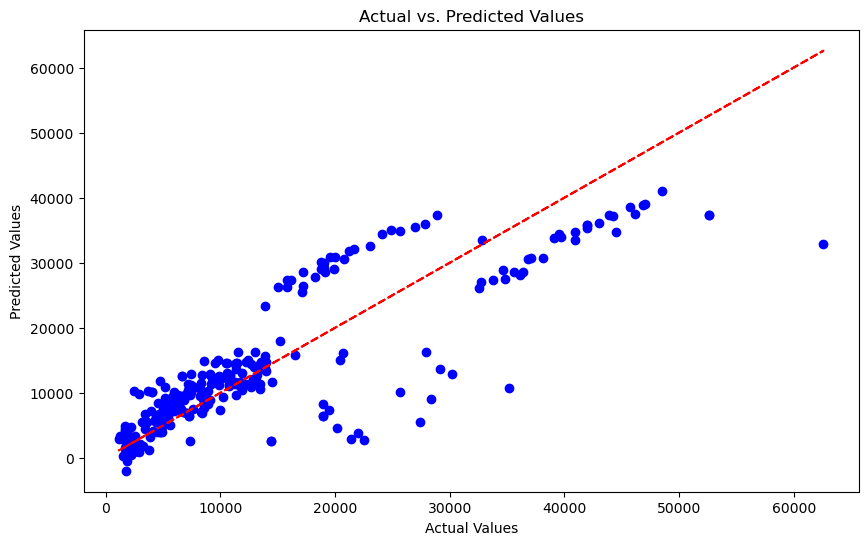

In [371]:
act_vs_pred_plot(test_df['charges'], test_df['charges_pred'])
# Scale the cefficients
# Regulaization parameter
# Change test train split before scaling
# 

In [372]:
test_df.head()

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges,sc_charges_pred,age,bmi,children,charges,charges_pred,residual
2220,1,0,1,0,0,-0.220874,0.508890,-0.083758,-0.648904,-0.371161,36.0,33.820,1.0,5377.45780,8751.916181,-3374.458381
864,1,0,0,0,1,0.844549,-0.865054,-0.907084,-0.368647,-0.381602,51.0,25.400,0.0,8782.46900,8625.071199,157.397801
374,1,0,0,1,0,-1.357325,0.428933,-0.907084,-0.976976,-0.811309,20.0,33.330,0.0,1391.52870,3404.309938,-2012.781238
422,1,1,0,0,0,0.063239,0.338371,-0.083758,2.128795,1.694296,40.0,32.775,1.0,39125.33225,33846.350293,5278.981957
840,1,0,0,0,1,-1.286297,0.065050,-0.907084,-0.965882,-0.859590,21.0,31.100,0.0,1526.31200,2817.720455,-1291.408455


In [373]:
X_train.describe()

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000
mean,0.504411,0.202085,0.239374,0.275461,0.242582,-0.000954,0.006596,0.007025
std,0.500081,0.401636,0.426787,0.446836,0.428730,1.001070,0.995954,1.006903
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.499381,-2.405438,-0.907084
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.931156,-0.715748,-0.907084
50%,1.000000,0.000000,0.000000,0.000000,0.000000,-0.007790,-0.033671,-0.083758
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.844549,0.676757,0.739567
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.767915,3.659823,3.209543


In [374]:

y_train.describe()

count    2494.000000
mean       -0.000704
std         0.999325
min        -0.999170
25%        -0.707024
50%        -0.318958
75%         0.262521
max         4.157269
Name: sc_charges, dtype: float64

In [375]:
y_test.describe()

count    278.000000
mean       0.006313
std        1.009617
min       -0.998012
25%       -0.685535
50%       -0.351608
75%        0.322476
max        4.060347
Name: sc_charges, dtype: float64

In [382]:
categorical_features = ['sex', 'smoker', 'northwest', 'southeast', 'southwest']
for feature in categorical_features:
    print("Distribution of", feature , " in Xtrain")
    print(X_train[feature].value_counts())
    print("\n")
    print("Distribution of", feature , " in Xtest")
    print(X_test[feature].value_counts())
    print("="*20)
    print("\n")

Distribution of sex  in Xtrain
1    1258
0    1236
Name: sex, dtype: int64


Distribution of sex  in Xtest
1    148
0    130
Name: sex, dtype: int64


Distribution of smoker  in Xtrain
0    1990
1     504
Name: smoker, dtype: int64


Distribution of smoker  in Xtest
0    218
1     60
Name: smoker, dtype: int64


Distribution of northwest  in Xtrain
0    1897
1     597
Name: northwest, dtype: int64


Distribution of northwest  in Xtest
0    211
1     67
Name: northwest, dtype: int64


Distribution of southeast  in Xtrain
0    1807
1     687
Name: southeast, dtype: int64


Distribution of southeast  in Xtest
0    199
1     79
Name: southeast, dtype: int64


Distribution of southwest  in Xtrain
0    1889
1     605
Name: southwest, dtype: int64


Distribution of southwest  in Xtest
0    199
1     79
Name: southwest, dtype: int64




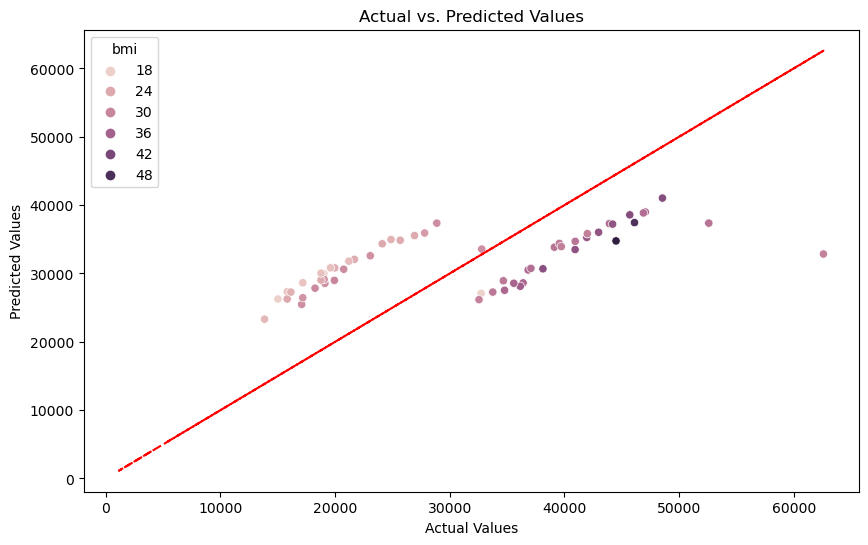

In [395]:
sns.scatterplot(data=test_df[test_df['smoker'] == 1], x='charges', y='charges_pred', hue='bmi')
plt.plot(test_df['charges'], test_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

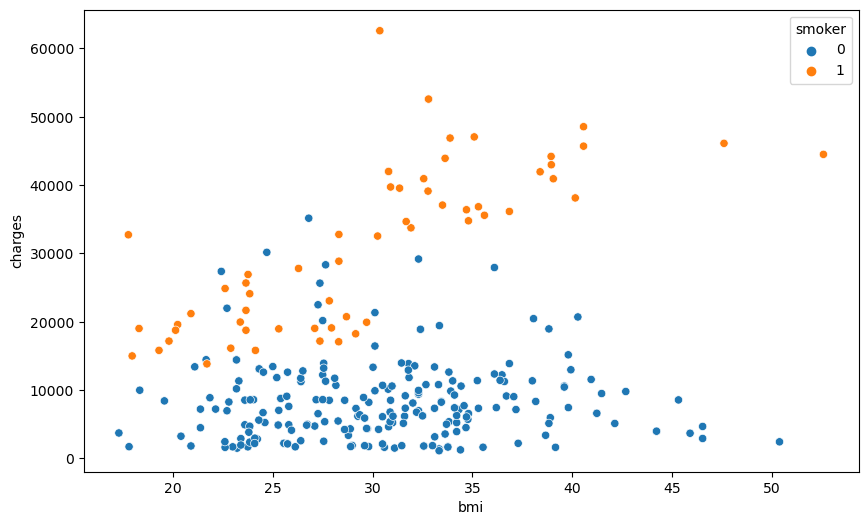

In [402]:
sns.scatterplot(data=test_df, x='bmi', y='charges', hue='smoker')
#plt.plot(test_df['charges'], test_df['charges'], color='red', linestyle='--')  # Add a line of perfect prediction (y=x)
plt.show()

In [400]:
test_df[(test_df['smoker'] == 1) & (test_df['residual'] > 0)].describe()

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges,sc_charges_pred,age,bmi,children,charges,charges_pred,residual
count,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000
mean,0.741935,1.0,0.161290,0.451613,0.290323,0.005958,0.711439,-0.189994,2.340403,1.668099,39.193548,35.06129,0.870968,41696.273304,33528.068388,8168.204916
std,0.444803,0.0,0.373878,0.505879,0.461414,1.054383,0.975523,0.920308,0.547547,0.346455,14.844571,5.97834,1.117794,6652.458649,4209.280156,4619.037078
min,0.000000,1.0,0.000000,0.000000,0.000000,-1.499381,-2.110905,-0.907084,1.587460,1.061951,18.000000,17.76500,0.000000,32548.340500,26163.626257,5153.310408
25%,0.500000,1.0,0.000000,0.000000,0.000000,-0.931156,0.179274,-0.907084,1.922384,1.354986,26.000000,31.80000,0.000000,36617.521500,29723.874098,6281.111015
50%,1.000000,1.0,0.000000,0.000000,0.000000,0.063239,0.518680,-0.907084,2.278262,1.740128,40.000000,33.88000,0.000000,40941.285400,34403.184092,6979.836071
75%,1.000000,1.0,0.000000,1.000000,1.000000,0.880063,1.299479,0.739567,2.620695,1.975290,51.500000,38.66500,2.000000,45101.710275,37260.303130,7899.337317
max,1.000000,1.0,1.000000,1.000000,1.000000,1.767915,3.570076,1.562893,4.060347,2.285662,64.000000,52.58000,3.000000,62592.873090,41031.192680,29744.672458


In [401]:
test_df[(test_df['smoker'] == 1) & (test_df['residual'] < 0)].describe()

,sex,smoker,northwest,southeast,southwest,sc_age,sc_bmi,sc_children,sc_charges,sc_charges_pred,age,bmi,children,charges,charges_pred,residual
count,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.517241,1.0,0.241379,0.310345,0.206897,-0.017587,-1.047502,0.114976,0.603513,1.404104,38.862069,24.281897,1.241379,20593.803412,30320.643640,-9726.840228
std,0.508548,0.0,0.435494,0.470824,0.412251,0.953647,0.576249,1.136052,0.373019,0.288842,13.426318,3.531452,1.379834,4532.019324,3509.308702,1976.692868
min,0.000000,1.0,0.000000,0.000000,0.000000,-1.499381,-2.079901,-0.907084,0.047996,0.827397,18.000000,17.955000,0.000000,13844.506000,23313.893483,-11507.451897
25%,0.000000,1.0,0.000000,0.000000,0.000000,-0.718071,-1.468806,-0.907084,0.322493,1.200720,29.000000,21.700000,0.000000,17179.522000,27849.608680,-10848.093474
50%,1.000000,1.0,0.000000,0.000000,0.000000,-0.007790,-1.132663,-0.083758,0.481203,1.374363,39.000000,23.760000,1.000000,19107.779600,29959.296168,-10089.588502
75%,1.000000,1.0,0.000000,1.000000,0.000000,0.560436,-0.468536,0.739567,0.806946,1.591027,47.000000,27.830000,2.000000,23065.420700,32591.673919,-9271.023594
max,1.000000,1.0,1.000000,1.000000,1.000000,1.767915,-0.163396,3.209543,1.607141,1.983918,64.000000,29.700000,5.000000,32787.458590,37365.132788,-776.289953
